In [214]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [215]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import os

In [324]:
DATA_DIR = "../OFC_data/"
IMG_DIR = "./images/EC125"
os.makedirs(IMG_DIR, exist_ok=True)
fn = "v7_EC125_TimeAveragedSpectraPower_6mA_FreqBands.pkl"

In [325]:
with open(f"{DATA_DIR}/{fn}", "rb") as f:
    data_dict = np.load(f, allow_pickle=True).item()

In [326]:
dataset_keys = [name for name in data_dict.keys()]
print("\n".join(dataset_keys))

Fs
dsFs
finalVerifiedChanNames
finalVerifiedRegions
freqs
meanAfterStim
meanBeforeStim
meanDuringStim
numVerifiedChans
power_stim
regionNames
stimEndSample
stimStartSample


In [327]:
power = data_dict["power_stim"]
freqs = data_dict["freqs"]

print(power.shape)
cutoff_idx = np.where(freqs > 20)[0][0]
power = power[:, :cutoff_idx]
print(cutoff_idx)
freqs = freqs[:cutoff_idx]

(17, 31, 224964)
17


In [328]:
Fs = data_dict["Fs"]
dsFs = data_dict["dsFs"]
stim_start = int(np.floor(int(1.0 * data_dict["stimStartSample"]) * dsFs / Fs))
stim_end = int(np.floor(int(1.0 * data_dict["stimEndSample"]) * dsFs / Fs))

stim_start = int(1.0 * data_dict["stimStartSample"])
stim_end = int(1.0 * data_dict["stimEndSample"])

print(stim_start, stim_end)
print(stim_start * dsFs / Fs, stim_end * dsFs / Fs)

12972 131088
810.75 8193.0


In [329]:
finalVerifiedChanNames = data_dict["finalVerifiedChanNames"]
finalVerifiedRegions = data_dict["finalVerifiedRegions"]
regionNames = data_dict["regionNames"]

In [330]:
print(len(freqs))
print(freqs)
print(len(finalVerifiedChanNames))
print(finalVerifiedChanNames)
print(finalVerifiedRegions)
print(regionNames)

17
[ 4.07492865  4.499086    4.96739367  5.48444726  6.05532071  6.6856161
  7.38151862  8.14985731  8.99817199  9.93478734 10.96889452 12.11064142
 13.37123219 14.76303725 16.29971462 17.99634398 19.86957468]
17
['AOF1' 'AOF4' 'POF2' 'AD2' 'AD3' 'AD4' 'HD2' 'HD3' 'SC3' 'SC4' 'IC2'
 'IC3' 'IND1' 'IND2' 'IND3' 'IND4' 'IND5']
[1 1 1 2 2 2 3 3 4 4 5 5 6 6 6 6 6]
['OFC' 'Amygdala' 'Hippocampus' 'SuperiorCingulate' 'InferiorCingulate'
 'Insula']


In [331]:
np.mean(power[0], axis=1, keepdims=True)

array([[245.1663979 ],
       [253.0723832 ],
       [257.63782854],
       [258.37964451],
       [256.86477345],
       [259.02232717],
       [271.70283955],
       [295.14520615],
       [316.8161917 ],
       [315.27080938],
       [279.41587631],
       [221.33539861],
       [166.61067461],
       [130.88774282],
       [110.00527317],
       [ 94.69747975],
       [ 80.21302509]])

Power

In [332]:
power.shape

(17, 17, 224964)

In [333]:
plt_data = power[0]
plt_data = (
    plt_data - np.mean(plt_data[:, :stim_start], axis=1, keepdims=True)
) / np.std(plt_data[:, :stim_start], axis=1, keepdims=True)

total_zscore = (plt_data - np.mean(plt_data[:, :], axis=1, keepdims=True)) / np.std(
    plt_data[:, :], axis=1, keepdims=True
)

In [334]:
print(
    "difference between mean before stimulation and mean of entire time series: ",
    np.mean(plt_data[:, :stim_start], axis=1, keepdims=True)
    - np.mean(plt_data[:, :], axis=1, keepdims=True),
)
print(
    "difference between std before stimulation and std of entire time series: ",
    np.std(plt_data[:, :stim_start], axis=1, keepdims=True)
    - np.std(plt_data[:, :], axis=1, keepdims=True),
)

difference between mean before stimulation and mean of entire time series:  [[ 0.1090118 ]
 [ 0.08243236]
 [ 0.06947052]
 [ 0.09676489]
 [ 0.1595113 ]
 [ 0.19632544]
 [ 0.18773472]
 [ 0.16357717]
 [ 0.15235425]
 [ 0.15752102]
 [ 0.1492423 ]
 [ 0.13532024]
 [ 0.14285623]
 [ 0.1026386 ]
 [ 0.01439873]
 [-0.05314435]
 [-0.05855358]]
difference between std before stimulation and std of entire time series:  [[ 0.11997744]
 [ 0.06499346]
 [-0.00907242]
 [-0.0770985 ]
 [-0.06657683]
 [ 0.04570481]
 [ 0.11940833]
 [ 0.1251283 ]
 [ 0.13983914]
 [ 0.15906757]
 [ 0.15808931]
 [ 0.10790891]
 [ 0.09283505]
 [ 0.17882337]
 [ 0.08877068]
 [-0.02281845]
 [-0.00780317]]


In [335]:
np.unravel_index(np.argmax(np.abs(plt_data)), plt_data.shape)

(4, 148993)

In [336]:
row = power[0][2]
row = (row - np.mean(row[:stim_start], keepdims=True)) / np.std(
    row[:stim_start], keepdims=True
)
np.max(row)

20.204492113335593

In [337]:
np.floor((stim_start / Fs) * dsFs)

810.0

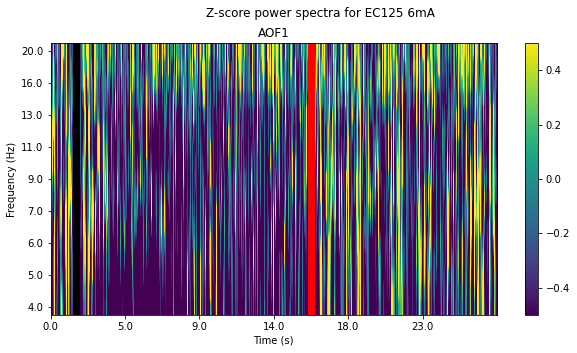

In [341]:
fig, ax = plt.subplots(figsize=(10, 5))
# this is spectrogram of one electrode (or averaged), dimensions (freq, time)
plt_data = np.mean(power[0:5], axis=0) # average over electrodes in OFC
# plt_data = power[2] # one electrode in OFC

# take z-score of power spectra before stim
plt_data = (
    plt_data - np.mean(plt_data[:, :stim_start], axis=1, keepdims=True)
) / np.std(plt_data[:, :stim_start], axis=1, keepdims=True)

im = ax.imshow(
    plt_data, aspect="auto", cmap="viridis", vmin = -0.5, vmax=0.5
)  # plot lower frequency at bottom
ax.axvline(stim_start, color="black", lw=7)
ax.axvline(stim_end, color="red", lw=7)
fig.colorbar(im, ax=ax)
ax.invert_yaxis()
steps = 6
chosen_indices = np.arange(0, len(power[0]))[:: len(power[0]) // (steps)]
ax.set_yticks(chosen_indices)
ax.set_yticklabels(np.round([freqs[i] for i in chosen_indices]))
time_steps = 6
time_indices = np.arange(0, len(plt_data[0]))[:: len(plt_data[0]) // (time_steps)]
ax.set_xticks(time_indices)
ax.set_xticklabels(np.round([i / Fs for i in time_indices]))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title(f"{finalVerifiedChanNames[0]}")
title = "Z-score power spectra for EC125 6mA"
fig.suptitle(f"{title}")
fig.savefig(f"{IMG_DIR}/{title}.png", facecolor="white", transparent=False)

In [212]:
np.mean(plt_data, axis=1), np.std(plt_data, axis=1)

(array([ 4.48034352e-15, -3.04403394e-15,  9.60123722e-15, -4.03231480e-15,
        -5.06535134e-15,  8.53221600e-15,  7.22844470e-15, -1.56468140e-15,
         1.76131422e-14, -9.06253275e-16,  1.07161193e-14, -2.23127566e-15,
        -6.18090774e-15,  7.31534688e-15,  1.89188692e-14, -3.31471780e-15,
         2.21657396e-15, -6.68515994e-16, -3.55368377e-14,  4.65863387e-15,
        -4.29728694e-15]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]))

In [213]:
fig, axes = plt.subplots(5, 4, sharey=True, sharex=True, figsize=(20, 20))
for i in range(len(axes)):
    for j in range(len(axes[i])):
        ax = axes[i][j]
        plt_data = power[i * len(axes[i]) + j]
        v = np.max(np.abs(plt_data))
        im = ax.imshow(
            plt_data, aspect="auto", cmap="Greys"
        )  # plot lower frequency at bottom
        ax.axvline(stim_start, color="blue")
        ax.axvline(stim_end, color="blue")
        fig.colorbar(im, ax=ax)
        ax.invert_yaxis()
        steps = 6
        chosen_indices = np.arange(0, len(power[0]))[:: len(power[0]) // (steps)]
        ax.set_yticks(chosen_indices)
        ax.set_yticklabels(np.round([freqs[i] for i in chosen_indices]))
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Frequency (Hz)")
        ax.set_title(f"{finalVerifiedChanNames[i*len(axes[i]) + j]}")
fig.suptitle("EC 105 1mA Spectra")
fig.tight_layout()

IndexError: index 17 is out of bounds for axis 0 with size 17

Error in callback <function flush_figures at 0x7f89049b7680> (for post_execute):


KeyboardInterrupt: 

Log power

Text(0.5, 1.0, 'AOF1')

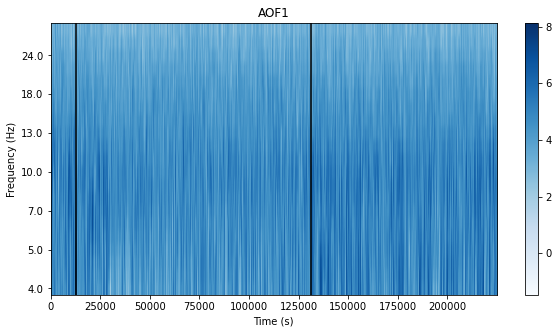

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt_data = np.log(np.mean(power[:3], axis=0))
im = ax.imshow(plt_data, aspect="auto", cmap="Blues")  # plot lower frequency at bottom
ax.axvline(stim_start, color="black")
ax.axvline(stim_end, color="black")
fig.colorbar(im, ax=ax)
ax.invert_yaxis()
steps = 6
chosen_indices = np.arange(0, len(power[0]))[:: len(power[0]) // (steps)]
ax.set_yticks(chosen_indices)
ax.set_yticklabels(np.round([freqs[i] for i in chosen_indices]))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title(f"{finalVerifiedChanNames[0]}")

IndexError: index 18 is out of bounds for axis 0 with size 18

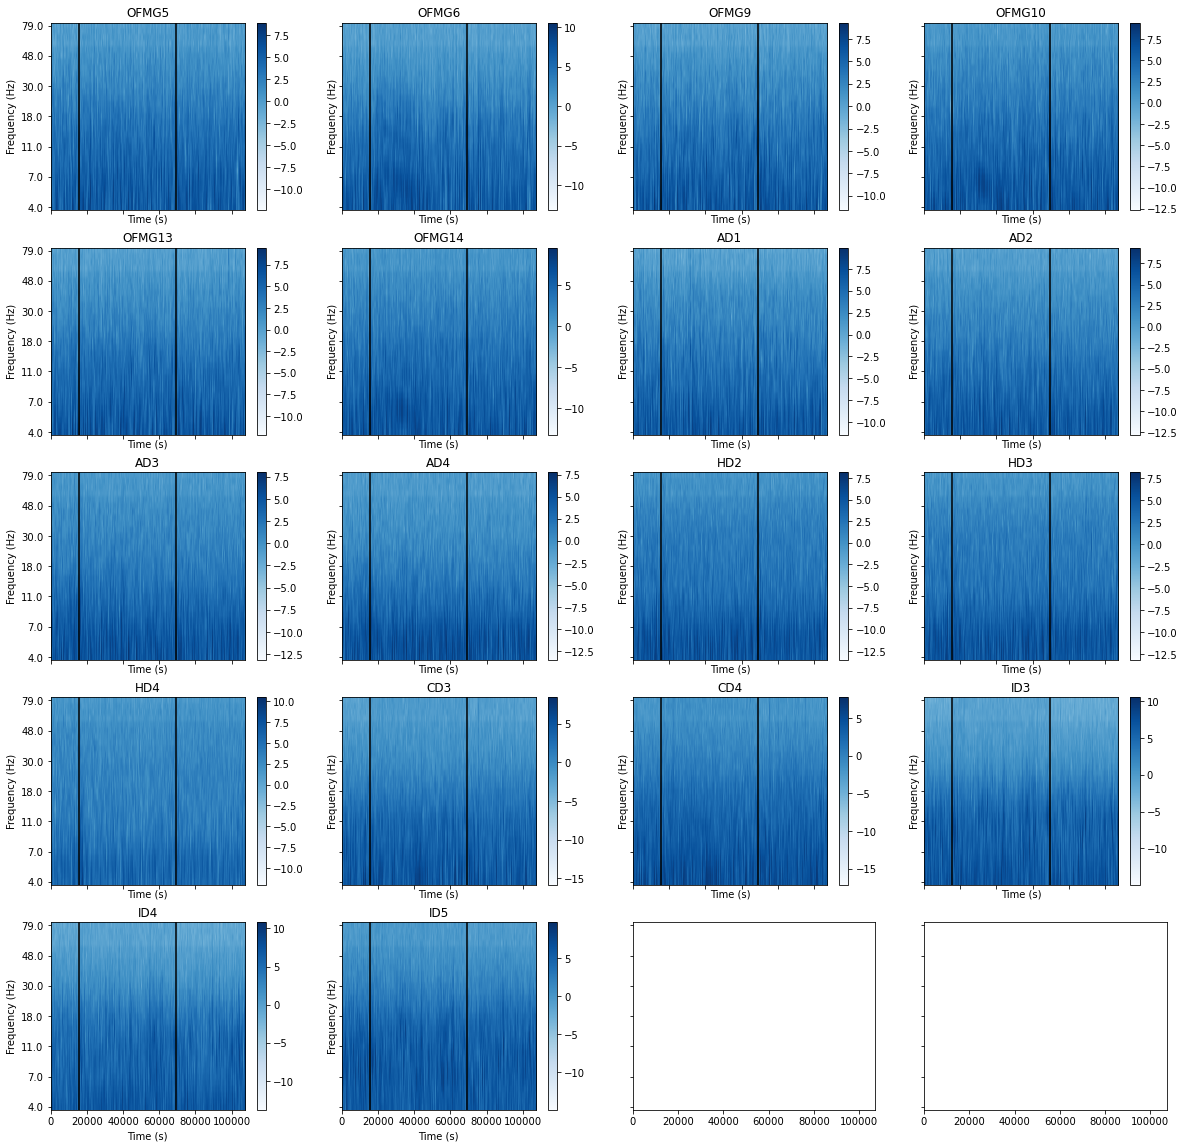

In [ ]:
fig, axes = plt.subplots(5, 4, sharey=True, sharex=True, figsize=(20, 20))
for i in range(len(axes)):
    for j in range(len(axes[i])):
        ax = axes[i][j]
        plt_data = np.log(power[i * len(axes[i]) + j])
        im = ax.imshow(plt_data, aspect="auto", cmap="Blues")
        ax.axvline(stim_start, color="black")
        ax.axvline(stim_end, color="black")
        fig.colorbar(im, ax=ax)
        ax.invert_yaxis()
        steps = 6
        chosen_indices = np.arange(0, len(power[0]))[:: len(power[0]) // (steps)]
        ax.set_yticks(chosen_indices)
        ax.set_yticklabels(np.round([freqs[i] for i in chosen_indices]))
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Frequency (Hz)")
        ax.set_title(f"{finalVerifiedChanNames[i*len(axes[i]) + j]}")
fig.suptitle("EC 105 1mA Spectra")
fig.tight_layout()

Power

In [ ]:
()

array([ 1,  6, 11, 16, 21, 26])